In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [2]:
df = pd.read_csv("Chemical Composion of Ceramic.csv")
df

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,DY-M-3-g,Glaze,0.34,0.55,12.37,70.70,5.33,8.06,0.06,1.61,1250,10,90,30,250,520,30,140,690
84,DY-QC-1-g,Glaze,0.72,0.34,12.20,72.19,6.19,6.06,0.04,1.27,1700,60,110,10,270,540,40,120,630
85,DY-QC-2-g,Glaze,0.23,0.24,12.99,71.81,5.25,7.15,0.05,1.29,750,40,100,0,240,470,40,120,480
86,DY-QC-3-g,Glaze,0.14,0.46,12.62,69.16,4.34,11.03,0.05,1.20,920,40,90,20,230,470,40,130,1100


In [3]:
# Drop redundant columns

df = df.drop(['Ceramic Name','Part'], axis=1)

In [4]:
df.isnull().sum()

Na2O     0
MgO      0
Al2O3    0
SiO2     0
K2O      0
CaO      0
TiO2     0
Fe2O3    0
MnO      0
CuO      0
ZnO      0
PbO2     0
Rb2O     0
SrO      0
Y2O3     0
ZrO2     0
P2O5     0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Na2O,88.0,0.471705,0.348779,0.03,0.2475,0.375,0.6425,1.88
MgO,88.0,0.430114,0.215030,0.07,0.2700,0.405,0.5300,1.32
Al2O3,88.0,17.460909,4.703422,11.30,13.0075,16.205,21.7075,26.48
SiO2,88.0,69.825114,2.754377,63.88,67.7375,69.990,71.8400,75.95
K2O,88.0,4.978409,0.879467,2.73,4.3375,5.065,5.5900,6.74
CaO,88.0,4.171818,4.305801,0.12,0.1800,2.690,7.9125,13.69
TiO2,88.0,0.101250,0.053430,0.04,0.0700,0.080,0.1300,0.29
Fe2O3,88.0,1.561591,0.604276,0.58,1.0975,1.510,1.9250,3.11
MnO,88.0,818.750000,614.240607,180.00,380.0000,590.000,982.5000,2970.00
CuO,88.0,30.909091,19.096630,0.00,20.0000,30.000,40.0000,80.00


In [6]:
# scaling

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [7]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(scaled_features)

PCA()

In [8]:
# we look at which variable has higher variance

exp_var_pca = pca.explained_variance_

<BarContainer object of 17 artists>

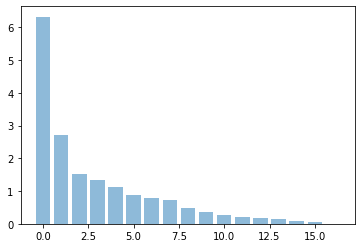

In [9]:
# let's visualize

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')

In [10]:
# these are default values
kmeans_kwargs = {
     "init": "random",
     'n_init':10,
     'max_iter':300,
                }
# A list holds the SSE values for each k
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    # first two variables have higher variance 
    kmeans.fit(scaled_features[:,:2])
    sse.append(kmeans.inertia_)

In [11]:
sse


[114.90324851028099,
 69.04329944643904,
 50.11697358740213,
 33.09190688211771,
 27.16964974268236,
 23.443005855451908,
 20.505592139008186,
 18.40942281401143,
 16.04483889457627]

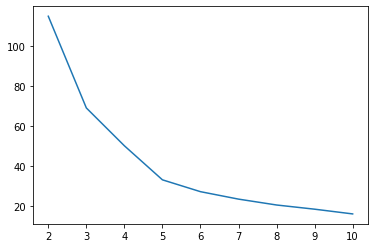

In [12]:
plt.plot(range(2, 11), sse)

In [13]:
# kl = KneeLocator( range(2, 11), sse, curve="convex", direction="decreasing" )

# kl.elbow

In [14]:
#elbow method 

kmeans = KMeans(n_clusters=3)

In [15]:
df['clusters'] = kmeans.fit_predict(scaled_features[:,:2])


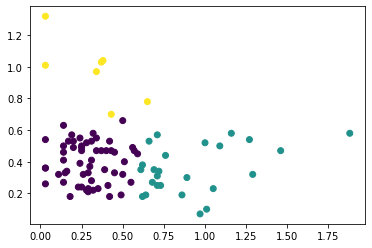

In [16]:
plt.scatter(df['Na2O'],df['MgO'], c=df.clusters, cmap="viridis" )


In [17]:
df.clusters.value_counts()

0    56
1    25
2     7
Name: clusters, dtype: int64

In [18]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# ax.scatter3D(df['Na2O'],df['MgO'],c=sum(df['Al2O3'],sum(df['Na2O'],df['MgO'])), cmap=plt.get_cmap('Purples'))

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()

In [19]:
# another way to choose best k 

In [20]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features[:,:2])
    score = silhouette_score(scaled_features[:,:2], kmeans.labels_)
    silhouette_coefficients.append(score)

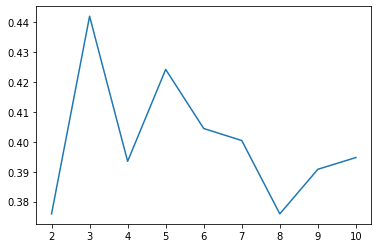

In [21]:
plt.plot(range(2, 11), silhouette_coefficients)

In [22]:
# the best k is the one with the highest score

kmeans = KMeans(n_clusters=3)

In [23]:
df['clusters_sec'] = kmeans.fit_predict(scaled_features[:,:2])


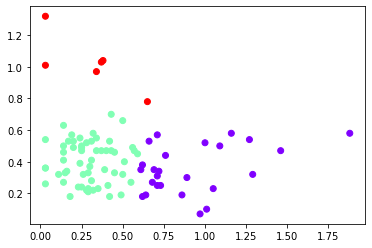

In [24]:
plt.scatter(df['Na2O'],df['MgO'],c=df['clusters_sec'],cmap='rainbow')

In [25]:
df.clusters_sec.value_counts()

1    57
0    25
2     6
Name: clusters_sec, dtype: int64

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['clusters_sec'],kmeans.labels_))

[[25  0  0]
 [ 0 57  0]
 [ 0  0  6]]
